In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv("mood_data.csv")
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

y = m * x + b

to 

y = w₁·x₁ + w₂·x₂ + ... + wₙ·xₙ + b


In [98]:
class MultVarLinearRegressionModel:
    def __init__(self):
        self.weights = None # holds weights w1,w2,w3,wn
        self.bias = 0       # Intercept term (b)


    # This uses matrix math (called the Normal Equation) to find the best weights.
    def fit(self, X, y): 
        """
        Fit the model using the Normal Equation:
        w = (X^T X)^-1 X^T y
        """
        ones = np.ones((X.shape[0], 1))        # Column of 1s to simulate bias term
        X_b = np.hstack([ones, X])             # Augmented X with bias term
        X_transpose = X_b.T

        self.theta = np.linalg.inv(X_transpose @ X_b) @ X_transpose @ y

        self.bias = self.theta[0]              # First value = intercept
        self.weights = self.theta[1:]          # Rest = weights for each feature

    def predict(self, X):
        """
        Predict using:
        y_pred = X * w + b
        """
        return X @ self.weights + self.bias 
        # No longer loop manually, instead, this uses NumPy to predict in bulk using matrix multiplication.


    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)



### Bias and Ones Matrix (for Matrix Regression)

**bias** = shifts the entire prediction up or down.

We want to create a ones matrix.

Here, I'm simulating 2 sample rows with 7 features.

In this case, `X_test.shape[0]` creates 1 bias for each row,  
generating a matrix with 2 rows and 1 column of ones.

---

#### Why do this?

Because the bias/intercept term **b** in a regression model isn't multiplied by a feature it's just added at the end:

y = w1x1 + w1x2 + ... + 2nxn + b

To represent this using matrix multiplication, we trick the math by turning **b** into a weight of 1s:

y = θ0*1 + θ1x1 + ... + θnxn

So basically:

so basically θ0 = b


In [99]:
X_test = np.array([[7, 3, 30, 8, 60, 2, 1],
                   [6, 5, 20, 7, 50, 1.5, 2]])
y_test = np.array([8, 7])
one_m_test = np.ones((X_test.shape[0], 1)) # shape 2,1
print(f"{one_m_test}")


[[1.]
 [1.]]


Combine ones array and then transpose it

In [100]:
X_b_test = np.hstack([one_m_test, X_test])    

print(f"{X_b_test}")
print(f"{X_b_test.shape}")

[[ 1.   7.   3.  30.   8.  60.   2.   1. ]
 [ 1.   6.   5.  20.   7.  50.   1.5  2. ]]
(2, 8)


In [101]:
X_b_transposed = X_b_test.T
print(f"{X_b_transposed}")
print(f"\n{X_b_transposed.shape}")

[[ 1.   1. ]
 [ 7.   6. ]
 [ 3.   5. ]
 [30.  20. ]
 [ 8.   7. ]
 [60.  50. ]
 [ 2.   1.5]
 [ 1.   2. ]]

(8, 2)


@ is for matrix multiplication

its the same as np.dot() but more cleaner for this case

nwo that we have everything prepared, then we can do normal equation 

Xt * X = Xt @ X

(Xt @ X)^-1 = np.linalg.inv(Xt @ X)

only square matrices can be inverted

then we multiply all of this with y which are our outputs


In [102]:
theta_test = (X_b_transposed @ X_b_test) @ X_b_transposed @ y_test

resulting in theta, holding all the learned values, [bias, w1, ..., wn]

These values control:

Example if the mode learns w_sleep = 0.6 and w_stress = - 0.8 then:
- Increasing sleep by 1 hour increases mood by 0.6
- increasing stress by 1 unit decreases mood by 0.8

so mood = b + w1x1 + w2x2 + ... + wnwn

In [103]:
bias_test = theta_test[0]  # First value = intercept
weights_test = theta_test[1:]  # Rest = weights for each feature
print(f"Bias: {bias_test}")
print(f"Weights: {weights_test}")

Bias: 113929.75
Weights: [ 746635.5    443534.75  2909165.     860565.25  6327057.5    202423.125
  164802.5  ]


# Training model

In [104]:
df = pd.read_csv("mood_data.csv")
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

In [105]:
model = MultVarLinearRegressionModel()
model.fit(X, y)


# y_predicted = x1*w1 + x2*w2 + x3*w3 + ... + xn*wn + b 

print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")


Bias: 1.0258069480228795
Weights: [ 0.46671372 -0.57156481 -0.00405049  0.45024843  0.00071675  0.23054032
 -0.14547289]


In [106]:
y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

Predictions: [ 4.78195539  6.63945969  6.08953086  4.67873358  5.77032478  4.46546179
  1.20270522  4.78776936  4.94498099  5.73711148  3.72742663  5.74789121
  4.57195588  4.82488842  3.15470776  4.69358508  5.89050165  6.50573941
  5.55936975  6.54497113  4.96454153  2.58067025  0.80981021  6.93383163
  3.8254753   3.04364708  2.05600717  4.11333501  3.8768465   2.02024099
  3.22149382  4.4904194   3.14426194  6.36773534  2.41661469  6.02629042
  4.09098894  6.16114946  3.26275144  6.33632048  6.63129474  4.58023228
  2.54128279  5.4697083   5.60949568  6.72909154  4.35212273  4.62711384
  5.57110858  6.59387291  5.24640643  5.27600947  6.02337726  5.43262736
  5.11175782  1.34576175  6.06394157  2.93411267  2.59567668  6.02805657
  5.54983137  4.38533658  5.16170369  3.98596839 -0.10133126  5.38637171
 -0.27563329  2.94077924  1.17303664  0.40955327  3.1456929   1.71226447
  6.41172114  4.39854617  6.84510886  0.0199222   4.52201066  4.09704247
  1.35335631  3.36026454  4.39683562  

In [107]:
mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.8381127202046004
Root Mean Squared Error: 0.9154849644885493


Mse of 0.83 is not bad, but I want a better result, like ~0.5

Root mean squared error give us the average error in natural units, 1 or less 

# drop caffeine col

In [108]:
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

print(f"{X.shape}")
print(f"{y.shape}")

(100, 6)
(100,)


In [109]:
model.fit(X, y)

print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")


y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

Bias: 0.5774492862682414
Weights: [ 0.47737341 -0.55894882 -0.00173356  0.46069368  0.00120421  0.23124395]
Predictions: [ 4.8980639   6.48624366  6.26535351  4.64765729  5.73044863  4.43167224
  1.27321758  4.91304798  5.15841922  5.62479855  3.72194319  5.57219846
  4.46411748  4.81618693  3.08605256  4.86113111  5.73072917  6.6029688
  5.5765703   6.68094706  5.09250024  2.56624618  0.97573892  6.85937739
  3.61909595  3.11050412  2.26682684  4.28735398  3.97928589  2.35106678
  3.02550424  4.50381888  3.27340118  6.16676304  2.38998644  6.1802742
  4.07526685  6.04333023  3.21924318  6.17127336  6.56911134  4.57658414
  2.36902019  5.43183128  5.57949856  6.87727907  4.33150774  4.55299816
  5.75748273  6.45946631  5.30539612  5.32184151  5.97690458  5.26552817
  4.93675992  1.27718995  6.17218589  2.91839609  2.36653851  6.12524965
  5.7124816   4.24300437  5.03593298  3.98847588 -0.09485614  5.37951539
 -0.09533577  2.73416288  1.18122149  0.41032859  2.94561728  1.46943215
  6.5

In [110]:
mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.8546821914717009
Root Mean Squared Error: 0.9244902333024946


looping through each value to drop it and test prediction

In [111]:
for col in feature_cols:
    temporal_features = feature_cols.copy()
    temporal_features.remove(col)
    X_temp = df[temporal_features].values  # shape (n_samples, n_features)

    model.fit(X_temp, y)
    predictions = model.predict(X_temp)
    mse = model.mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    print(f"Without {col} MSE: {mse:.4f}")
    print(f"Without {col} RMSE: {rmse:.4f}\n")


Without sleep_hours MSE: 0.9810
Without sleep_hours RMSE: 0.9904

Without stress_level MSE: 1.0360
Without stress_level RMSE: 1.0178

Without exercise_minutes MSE: 0.8549
Without exercise_minutes RMSE: 0.9246

Without nutrition_quality MSE: 1.0562
Without nutrition_quality RMSE: 1.0277

Without social_minutes MSE: 0.8568
Without social_minutes RMSE: 0.9256

Without water_liters MSE: 0.8597
Without water_liters RMSE: 0.9272



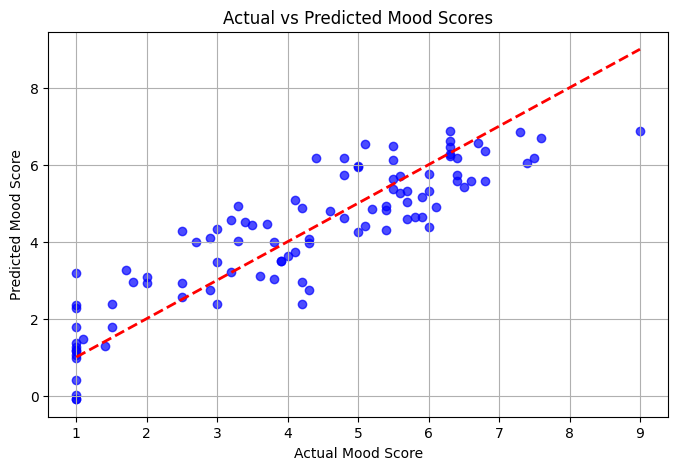

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.title("Actual vs Predicted Mood Scores")
plt.xlabel("Actual Mood Score")
plt.ylabel("Predicted Mood Score")
plt.grid(True)
plt.show()

Re train the model with 7 variables and 

In [113]:
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

model.fit(X, y)
print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")

y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Bias: 1.0258069480228795
Weights: [ 0.46671372 -0.57156481 -0.00405049  0.45024843  0.00071675  0.23054032
 -0.14547289]
Predictions: [ 4.78195539  6.63945969  6.08953086  4.67873358  5.77032478  4.46546179
  1.20270522  4.78776936  4.94498099  5.73711148  3.72742663  5.74789121
  4.57195588  4.82488842  3.15470776  4.69358508  5.89050165  6.50573941
  5.55936975  6.54497113  4.96454153  2.58067025  0.80981021  6.93383163
  3.8254753   3.04364708  2.05600717  4.11333501  3.8768465   2.02024099
  3.22149382  4.4904194   3.14426194  6.36773534  2.41661469  6.02629042
  4.09098894  6.16114946  3.26275144  6.33632048  6.63129474  4.58023228
  2.54128279  5.4697083   5.60949568  6.72909154  4.35212273  4.62711384
  5.57110858  6.59387291  5.24640643  5.27600947  6.02337726  5.43262736
  5.11175782  1.34576175  6.06394157  2.93411267  2.59567668  6.02805657
  5.54983137  4.38533658  5.16170369  3.98596839 -0.10133126  5.38637171
 -0.27563329  2.94077924  1.17303664  0.40955327  3.1456929   1

# Testing with custom input data

In [114]:
input_data = {
    'sleep_hours': [6.5],
    'stress_level': [2],
    'exercise_minutes': [20],
    'nutrition_quality': [5],
    'social_minutes': [45],
    'water_liters': [2],
    'caffeine_cups': [1]
}
input_df = pd.DataFrame(input_data)

predicted_mood = model.predict(input_df[feature_cols].values)
print(f"Predicted Mood Score: {predicted_mood[0]:.2f}")

Predicted Mood Score: 5.43


Text(0.5, 1.0, 'Feature Importance (Coefficients)')

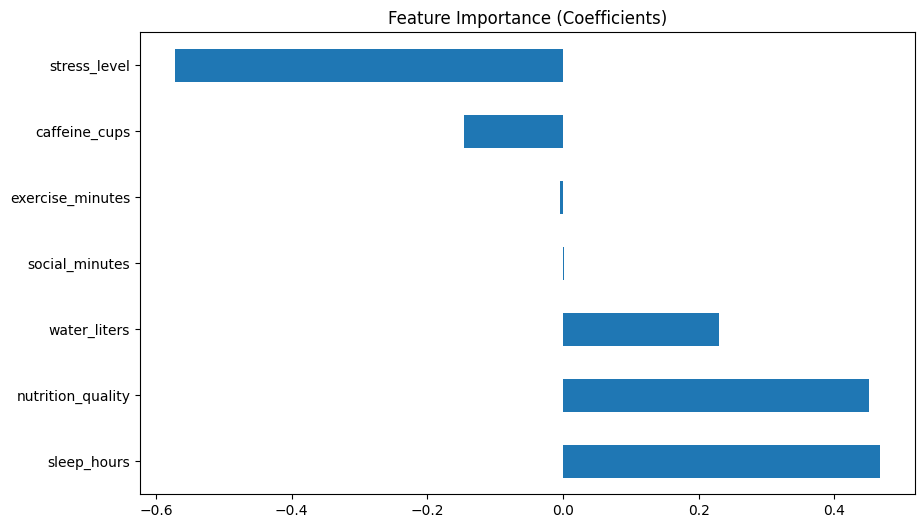

In [115]:
coeffs = pd.Series(model.weights, index=feature_cols)
coeffs.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Coefficients)')

This graph represents the influence of each feature on the output (mood score)
- Positive weights = increase mood
- Negative weights = decrease mood

We can observe how each variable contributes to a person's mood by examining the model coefficients:

- **Stress Level (-0.6):**
Has the strongest negative effect. As stress increases, mood significantly decreases. This aligns well with what we’d expect.

- **Caffeine Cups (-0.18):**
Slightly decreases mood. While caffeine provides a temporary energy boost, we're measuring mood at the end of the day, when caffeine effects usually wear off, often leading to an energy crash that may reduce overall mood.

- **Exercise Minutes (-0.01):**
Surprisingly shows a slight negative impact on mood. While exercise is generally associated with better mental health, this result may reflect post-exercise fatigue felt by the end of the day, reducing immediate mood.

- **Social Minutes (-0.001):**
Virtually no effect. The small negative weight suggests that for this dataset, socializing may slightly drain energy for some people, but the impact is statistically negligible.

- **Water Liters (+0.2):**
Has a clear positive impact. Hydration is essential for physical and mental function, and it's encouraging to see this reflected in mood.

- **Nutrition Quality (+0.45):**
Strongly contributes to higher mood. Balanced meals can improve energy, focus, and mood stability, making nutrition one of the most influential positive factors.

- **Sleep Hours (+0.45):**
The most impactful positive factor. Adequate sleep is essential for recovery and mental clarity. More sleep directly translates into better mood.

### Conclusion:
Contrary to common belief, exercise and socializing show minimal or slightly negative effects on end of day mood in this analysis. This doesn’t mean they're bad just that timing and context matter.

The most powerful positive combo for good mood is:

Getting enough sleep
Maintaining good nutrition
Staying hydrated

Meanwhile, reducing stress and limiting late-day caffeine could make a major difference.


## How does mood prediction differ between low stress vs high stress groups?
## What is the effect of sleep for peple who exercise vs who doesnt?

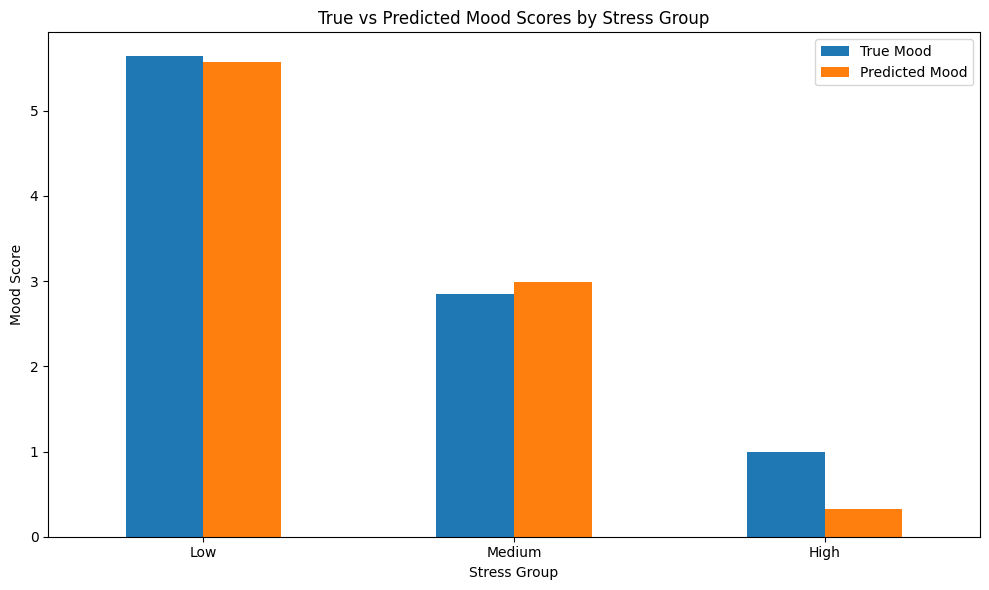

In [116]:
df["stress_group"] = pd.cut(df["stress_level"], bins=[0, 3, 6, 10], labels=["Low", "Medium", "High"],)
group_moods_true = df.groupby("stress_group", observed=True)["mood_score"].mean()

df["predicted_mood"] = model.predict(X)
group_stress_moods_pred = df.groupby("stress_group", observed=True)["predicted_mood"].mean()

combined = pd.DataFrame({
    "True Mood": group_moods_true,
    "Predicted Mood": group_stress_moods_pred
})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('True vs Predicted Mood Scores by Stress Group')
plt.ylabel('Mood Score')
plt.xlabel('Stress Group')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Here we are comparing the y values predicted vs the y values in the dataset. 

Lets compare both of them in each level of stress group

- On low stress group, Mood scores tend to be higher, which aligns with expectations. There is no significant difference between the predicted values and the actual mood scores — the model performs well in this group.

- On medium stress group, The predicted and actual values remain closely aligned. A clear trend is observable: as stress increases, mood decreases. This reinforces the model’s ability to capture the inverse relationship between stress and mood.

- On high stress group, This group shows a noticeable gap between the actual and predicted values. The actual mood scores are higher than the predicted ones, meaning the model overestimates the negative impact of high stress. In other words, real individuals in this group reported better moods than the model expected.




An idea is to create this type of grouping relationships on the web app so someone can generate these graphs 

In [117]:
print(df["mood_score"].values)
print(df["predicted_mood"].values)

[6.1 5.5 6.3 5.8 4.8 3.5 1.  3.3 5.9 5.5 4.1 6.6 3.7 5.4 2.  4.2 6.4 6.3
 6.4 7.6 4.1 2.5 1.  7.3 4.  3.6 1.  2.5 2.7 1.  3.8 3.4 1.7 6.4 4.2 4.4
 4.3 7.4 3.2 4.8 6.7 5.7 1.5 6.5 6.8 6.3 3.  3.2 6.  6.3 6.  5.7 5.  5.6
 5.4 1.4 7.5 2.5 3.  5.5 5.6 5.  5.7 3.8 1.  5.5 1.  4.3 1.  1.  1.8 1.1
 5.1 6.  9.  1.  5.9 2.9 1.  3.9 5.1 2.  5.  1.  1.  6.3 4.6 4.3 3.3 1.5
 1.  5.2 1.  3.  4.2 3.9 2.9 5.4 6.8 4.8]
[ 4.78195539  6.63945969  6.08953086  4.67873358  5.77032478  4.46546179
  1.20270522  4.78776936  4.94498099  5.73711148  3.72742663  5.74789121
  4.57195588  4.82488842  3.15470776  4.69358508  5.89050165  6.50573941
  5.55936975  6.54497113  4.96454153  2.58067025  0.80981021  6.93383163
  3.8254753   3.04364708  2.05600717  4.11333501  3.8768465   2.02024099
  3.22149382  4.4904194   3.14426194  6.36773534  2.41661469  6.02629042
  4.09098894  6.16114946  3.26275144  6.33632048  6.63129474  4.58023228
  2.54128279  5.4697083   5.60949568  6.72909154  4.35212273  4.62711384
  5.57110

In [127]:
print(df["sleep_group"].value_counts())


sleep_group
Medium      75
Low         24
Very Low     1
High         0
Name: count, dtype: int64


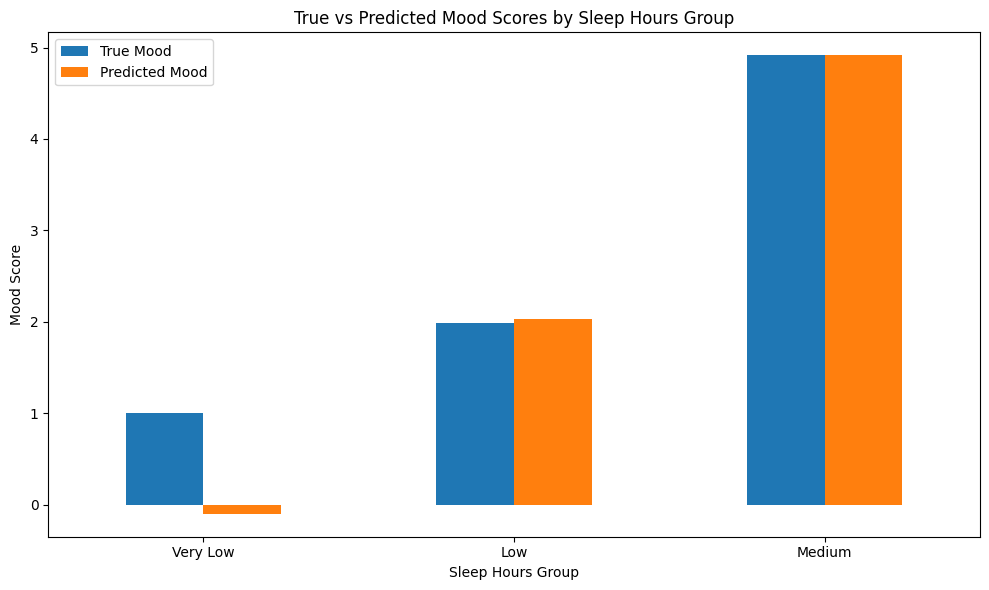

In [128]:
df["sleep_group"] = pd.cut(df["sleep_hours"], bins = [0, 3, 6, 9, 10], labels = ["Very Low", "Low", "Medium", "High"])
group_sleep_moods_true = df.groupby("sleep_group", observed=True)["mood_score"].mean()

df["predicted_mood"] = model.predict(X)
group_sleep_moods_pred = df.groupby("sleep_group", observed=True)["predicted_mood"].mean()

combined = pd.DataFrame({
    "True Mood": group_sleep_moods_true,
    "Predicted Mood": group_sleep_moods_pred
})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('True vs Predicted Mood Scores by Sleep Hours Group')
plt.ylabel('Mood Score')
plt.xlabel('Sleep Hours Group')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

I can see a really interesting insight here.
I discovered that the very low sleep group contains only one data point, probably from someone who slept less than 3hs.

As a result, the model struggled to make an accurate prediction for that case (very low group), The prediction was off compared to the true mood score. 

So this highlights how important is data to balance data during training. When certain groups are underrepresented, the model lacks sufficient examples to learn from and generalize correctly.

I can certainly say that graphs in these type of situation is really important like a diagnosis tool, because they allow us to visually compare the model prediction vs the real true value on different groups.

In this case I was able to spot where the model is underperforming.

There is multiple ways I imagine can work to fix this:
- Acknowledge the limitation, and move on. Well technically not a solution, but I've warned on the limitation, which is valid for reports or learning insights.
- The option B is to collect more samples with 0 to 3 hs of sleep, so the model is capable to generalize better.
- The other option is to combine with low group, so that group doesnt exist.

sleep_group
<6h     1.944000
6–8h    4.273333
8h+     5.876667
Name: mood_score, dtype: float64
sleep_group
<6h     1.942173
6–8h    4.353359
8h+     5.758151
Name: predicted_mood, dtype: float64


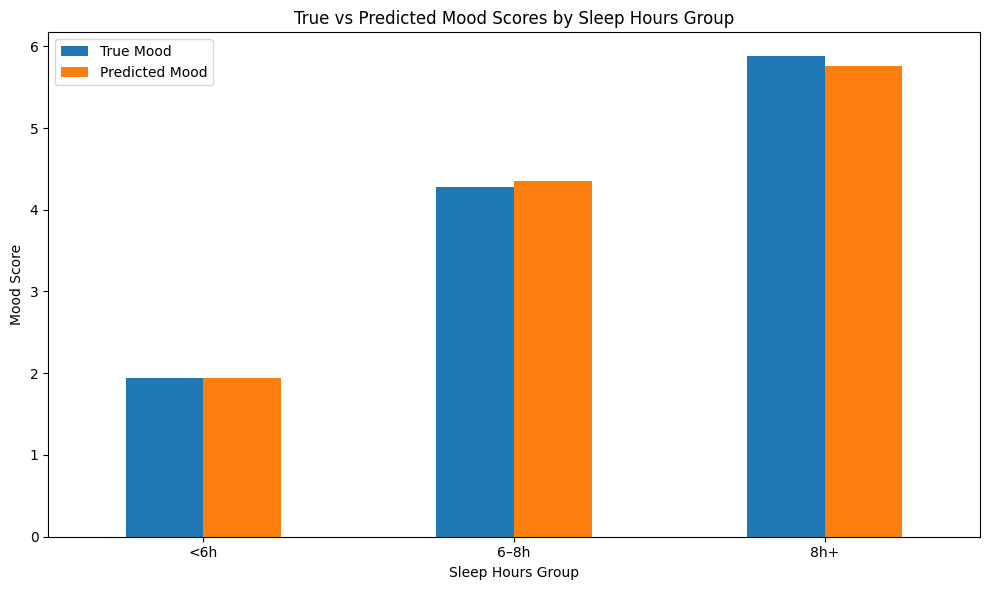

In [ ]:
df["sleep_group"] = pd.cut(df["sleep_hours"], 
                           bins = [0, 6, 8, df["sleep_hours"].max() + 1], 
                           labels = ["<6h", "6–8h", "8h+"])

group_sleep_moods_true = df.groupby("sleep_group", observed=True)["mood_score"].mean()

df["predicted_mood"] = model.predict(X)
group_sleep_moods_pred = df.groupby("sleep_group", observed=True)["predicted_mood"].mean()


combined = pd.DataFrame({
    "True Mood": group_sleep_moods_true,
    "Predicted Mood": group_sleep_moods_pred
})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('True vs Predicted Mood Scores by Sleep Hours Group')
plt.ylabel('Mood Score')
plt.xlabel('Sleep Hours Group')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [137]:
print(f"{group_sleep_moods_true}")
print(f"{group_sleep_moods_pred}")

sleep_group
<6h     1.944000
6–8h    4.273333
8h+     5.876667
Name: mood_score, dtype: float64
sleep_group
<6h     1.942173
6–8h    4.353359
8h+     5.758151
Name: predicted_mood, dtype: float64


Now that I've fixed the scale, im able to see a better value on the predicted values
- I don't see major problems here, probably that scale "very low" was too specific, and if we generalize more, we can see a really similar value to the actual mood score, actually surprisigly similar values.

- The rest of the graph, sleeping 6-8hs and +8hs have also good prediction scores, meaning that we had good quantity of sleeping rows for predict those values. The values differ a little bit, but not major problem in this case.